# Process the raw submissions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import spikefinder_eval as se

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
algos =  ['stm','chenkov', 'deneux', 'friedrich', 'machado', 'mineault', 
               'pachitariu', 'ringach', 'rupprecht', 'speiser', 'oopsi']

dsets = ['1.test', '2.test', '3.test', '4.test', '5.test', 
       '1.train', '2.train', '3.train', '4.train', '5.train']


In [3]:
dsets

['1.test',
 '2.test',
 '3.test',
 '4.test',
 '5.test',
 '1.train',
 '2.train',
 '3.train',
 '4.train',
 '5.train']

In [9]:
tab = pd.DataFrame(columns = ['value', 'algo', 'dset', 'split','measure', 'rel value', 'cell'])

for d, dset in enumerate(dsets):
    file = 'T:/data/spikefinder/truth/{}.spikes.csv'.format(dset)
    truth = se.load(file)
    
    for a, algo in enumerate(algos): 
        print(dset, algo)
        
        file = 'T:/data/spikefinder/{}/{}.spikes.csv'.format(algo, dset)
        data = se.load(file)
        
        if algo=='machado':
            data = data.iloc[:,1::]
        
        c = np.array(se.score(data, truth, method='corr', downsample=4))
        c_bits = -np.log2(1-c**2)
        
        s = np.array(se.score(data, truth, method='rank', downsample=4))
        
      #  info = np.array(se.score(data, truth, method='info', downsample=4))
        
        if algo=='stm':
            c_stm = c
            c_stm_bits = c_bits
            s_stm = s
           # i_stm = info
            
            c_rel = np.NaN * np.ones_like(c)
            c_rel_bits = np.NaN * np.ones_like(c)
            s_rel = np.NaN * np.ones_like(c)
            #i_rel = np.NaN * np.ones_like(c)
        else:
            c_rel = c - c_stm
            c_rel_bits = np.round(100*(c_bits-c_stm_bits)/c_stm_bits)
            s_rel = s - s_stm
            #i_rel = np.round(100*(info - i_stm)/i_stm)
            
        df = pd.DataFrame({'value': c,
                           'rel value': c_rel,
                           'algo': algo, 
                           'dset': dset[0], 
                           'split': dset[2::], 
                           'measure': 'corr', 
                           'cell': np.arange(0,len(c))})
        
        tab = pd.concat([tab,df])
        
        df = pd.DataFrame({'value': c_bits,
                           'rel value': c_rel_bits,
                           'algo': algo, 
                           'dset': dset[0], 
                           'split': dset[2::], 
                           'measure': 'corr_bits', 
                           'cell': np.arange(0,len(c))})
        
        tab = pd.concat([tab,df])
        
        
        df = pd.DataFrame({'value': s,
                           'rel value': s_rel,
                           'algo': algo, 
                           'dset': dset[0], 
                           'split': dset[2::], 
                           'measure': 'rank', 
                           'cell': np.arange(0,len(c))})
        
        tab = pd.concat([tab,df])
        
 #       df = pd.DataFrame({'value': info,
  #                         'rel value': i_rel,
   #                        'algo': algo, 
    #                       'dset': dset[0], 
     #                      'split': dset[2::], 
      #                     'measure': 'info', 
       #                    'cell': np.arange(0,len(c))})
        
      #  tab = pd.concat([tab,df])









1.test stm
1.test chenkov
1.test deneux
1.test friedrich
1.test machado
1.test mineault
1.test pachitariu
1.test ringach
1.test rupprecht
1.test speiser
1.test oopsi
2.test

C:\Users\pberens\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\pberens\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\pberens\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\pberens\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\pberens\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


 stm
2.test chenkov
2.test deneux
2.test friedrich
2.test machado
2.test mineault
2.test pachitariu
2.test ringach
2.test rupprecht
2.test speiser
2.test oopsi
3.test stm
3.test chenkov
3.test deneux
3.test friedrich
3.test machado
3.test mineault
3.test pachitariu
3.test ringach
3.test rupprecht
3.test speiser
3.test oopsi
4.test stm
4.test chenkov
4.test deneux
4.test friedrich
4.test machado
4.test mineault
4.test pachitariu
4.test ringach
4.test rupprecht
4.test speiser
4.test oopsi
5.test stm
5.test chenkov
5.test deneux
5.test friedrich
5.test machado
5.test mineault
5.test pachitariu
5.test ringach
5.test rupprecht
5.test speiser
5.test oopsi
1.train stm
1.train chenkov
1.train deneux
1.train friedrich
1.train machado
1.train mineault
1.train pachitariu
1.train ringach
1.train rupprecht
1.train speiser
1.train oopsi
2.train stm
2.train chenkov
2.train deneux
2.train friedrich
2.train machado
2.train mineault
2.train pachitariu
2.train ringach
2.train rupprecht
2.train speiser
2.

In [10]:
tab.head()

,algo,cell,dset,measure,rel value,split,value
0,stm,0,1,corr,NaN,test,0.524731
1,stm,1,1,corr,NaN,test,0.486117
2,stm,2,1,corr,NaN,test,0.454547
3,stm,3,1,corr,NaN,test,0.512064
4,stm,4,1,corr,NaN,test,0.560148


In [11]:
tab = tab.reset_index()

tab.to_csv('data/results_30_06_17.csv')

In [21]:
tab[tab['split']=='test'].groupby(['measure','algo']).mean()

cell   rel value      value
measure   algo                                      
corr      chenkov     3.15625   41.531250   0.437815
          deneux      3.15625   41.031250   0.438228
          friedrich   3.15625   23.031250   0.418848
          machado     3.15625    9.031250   0.379407
          mineault    3.15625   36.906250   0.432472
          oopsi       3.15625  -33.766667   0.253809
          pachitariu  3.15625   19.031250   0.396692
          ringach     3.15625   -3.531250   0.362944
          rupprecht   3.15625   28.312500   0.429115
          speiser     3.15625   38.593750   0.434734
          stm         3.15625         NaN   0.357193
corr_bits chenkov     3.15625  181.125000   0.346762
          deneux      3.15625  171.437500   0.353142
          friedrich   3.15625   70.281250   0.334318
          machado     3.15625   28.812500   0.271934
          mineault    3.15625  145.875000   0.350802
          oopsi       3.15625  -51.533333   0.137344
          pachitariu  3.15625   72.718750   0.293112
          ringach     3.15625    5.593750   0.256786
          rupprecht   3.15625   86.156250   0.342567
          speiser     3.15625  160.187500   0.346070
          stm         3.15625         NaN   0.234199
info      chenkov     3.15625         NaN        NaN
          deneux      3.15625         NaN        NaN
          friedrich   3.15625         NaN        NaN
          machado     3.15625         NaN        NaN
          mineault    3.15625         NaN        NaN
          oopsi       3.15625         NaN -11.850877
          pachitariu  3.15625         NaN        NaN
          ringach     3.15625         NaN        NaN
          rupprecht   3.15625         NaN        NaN
          speiser     3.15625         NaN        NaN
          stm         3.15625         NaN        NaN
rank      chenkov     3.15625    8.500000   0.290652
          deneux      3.15625    9.250000   0.288643
          friedrich   3.15625   16.687500   0.309133
          machado     3.15625    4.062500   0.280281
          mineault    3.15625   23.625000   0.325913
          oopsi       3.15625  -23.666667   0.198595
          pachitariu  3.15625    4.718750   0.281282
          ringach     3.15625    4.281250   0.281026
          rupprecht   3.15625    6.218750   0.284141
          speiser     3.15625    9.593750   0.292649
          stm         3.15625         NaN   0.268781

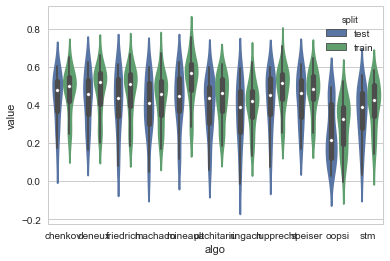

In [37]:
sns.violinplot(data=tab, x='algo', y='value', hue='split')


In [58]:
x = tab.groupby(['algo', 'split'])['value'].median().reset_index()

x[x['split']=='test'].sort('value', ascending=0)




C:\Users\pberens\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,algo,split,value
0,chenkov,test,0.479884
18,speiser,test,0.465704
2,deneux,test,0.456040
16,rupprecht,test,0.450754
8,mineault,test,0.446958
4,friedrich,test,0.439265
12,pachitariu,test,0.434261
6,machado,test,0.411850
14,ringach,test,0.391663
20,stm,test,0.388600


Check if dataset contains any submissions after the deadline

In [63]:
x = tab.groupby(['algo', 'dset', 'split'])['value'].median().reset_index()

x = x.groupby(['algo', 'split'])['value'].mean().reset_index()

x[x['split']=='test'].sort('value', ascending=0)


C:\Users\pberens\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,algo,split,value
8,mineault,test,0.464457
0,chenkov,test,0.461296
16,rupprecht,test,0.460598
2,deneux,test,0.455631
18,speiser,test,0.454813
4,friedrich,test,0.441689
12,pachitariu,test,0.423142
6,machado,test,0.406710
14,ringach,test,0.387945
20,stm,test,0.387497


Filter results for test data and correlation as measure only

In [5]:
data_test = data.loc[data['dset_dataset'].str.contains('test')]
data_test = data_test.loc[data_test['label_label']=='corr']

data_train = data.loc[data['dset_dataset'].str.contains('1.train|2.train|3.train|4.train|5.train')]
data_train = data_train.loc[data_train['label_label']=='corr']

Create a nice dataframe to work with

In [6]:
def weighted_mean(x,w):
    return np.sum(w * x)/np.sum(w)

entries = np.unique(data_test['algo_timestamp'])

test_mean = np.zeros_like(entries)
test_wmean = test_mean.copy()
train_mean = np.zeros_like(entries)
train_wmean = test_mean.copy()

algo = test_mean.copy()
submitter = test_mean.copy()
days = test_mean.copy()

w_test = [5, 10, 6, 3, 8]
w_train = [11, 20, 12, 6, 9]

start_date = pd.to_datetime('2016-11-01 00:00:00.0')

for i, date in enumerate(entries):
    df_test = data_test[data_test['algo_timestamp']==date].reset_index()
    df_train = data_train[data_train['algo_timestamp']==date].reset_index()

    scores = df_test['label_value'].as_matrix()
    test_mean[i] = np.mean(scores)
    test_wmean[i] = weighted_mean(scores,w_test)
    
    scores = df_train['label_value'].as_matrix()
    train_mean[i] = np.mean(scores)
    train_wmean[i] = weighted_mean(scores,w_train)
    
    algo[i] = df_test.loc[0,'algo_algorithm']
    
    submitter[i] = df_test.loc[0,'algo_name']
    
    days[i] = (pd.to_datetime(df_test.loc[0,'algo_timestamp'])-start_date).days
    
    
spikefinder = pd.DataFrame({'algo': algo,
                            'submitter': submitter,
                            'test_mean': test_mean,
                            'test_wmean': test_wmean,
                            'train_mean': train_mean,
                            'train_wmean': train_wmean,
                            'date': entries,
                            'days': days})

spikefinder = spikefinder.drop_duplicates(subset=['test_mean','submitter'])

stm = spikefinder.loc[spikefinder['algo']=='stm','test_mean'].as_matrix()
spikefinder['delta_stm'] = (spikefinder['test_mean'] - stm)

# one submission reports a training correlation of 1 - likely submitted original spike trains
spikefinder = spikefinder[spikefinder['train_mean']!=1]

# fix for filtering unique submitters
spikefinder.loc[spikefinder['submitter']==
                'Stephan Gerhard, Peter Rupprecht','submitter'] = 'Peter Rupprecht, Stephan Gerhard' 



### Top ten by test error

In [7]:
spikefinder.sort_values(by='test_mean',ascending=False).head(10)


,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
43,Purgatorio,2017-05-02 02:33:43.187,182,Patrick Mineault,0.464457,0.461653,0.58074,0.570199,0.0769593
52,convi6,2017-05-04 12:59:26.058,184,Nikolay,0.461296,0.461945,0.51327,0.504478,0.0737989
47,Embedding of CNNs via Ca recording stats,2017-05-02 07:56:05.626,182,"Peter Rupprecht, Stephan Gerhard",0.460598,0.461709,0.528088,0.51411,0.0731003
23,SpikeNet-3,2017-04-18 08:49:32.462,168,Thomas McColgan,0.455694,0.455387,0.511553,0.501417,0.0681964
8,MLspike,2017-02-23 15:18:17.677,114,Thomas Deneux,0.455631,0.459057,0.533527,0.526033,0.0681337
34,MLspike (autocalibration of noise for some dat...,2017-04-28 11:58:51.575,178,Thomas Deneux,0.454978,0.456862,0.537784,0.528465,0.0674801
38,DeepSpike (Fully Supervised),2017-05-01 22:58:32.331,181,Artur Speiser,0.454813,0.460792,0.503557,0.495718,0.0673159
49,"MLspike (optimize median, noise autocalibration)",2017-05-02 15:16:58.097,182,Thomas Deneux,0.453767,0.454553,0.552501,0.545296,0.0662699
51,convi3,2017-05-03 14:50:27.558,183,Nikolay,0.453582,0.457679,0.506875,0.497032,0.0660843
48,MLspike (optimize median),2017-05-02 15:12:48.948,182,Thomas Deneux,0.450482,0.451813,0.548677,0.542344,0.0629846


Top ten by weighted test error

In [8]:
# top 5 by weighted test error
spikefinder.sort_values(by='test_wmean',ascending=False).head()


,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
52,convi6,2017-05-04 12:59:26.058,184,Nikolay,0.461296,0.461945,0.51327,0.504478,0.0737989
47,Embedding of CNNs via Ca recording stats,2017-05-02 07:56:05.626,182,"Peter Rupprecht, Stephan Gerhard",0.460598,0.461709,0.528088,0.51411,0.0731003
43,Purgatorio,2017-05-02 02:33:43.187,182,Patrick Mineault,0.464457,0.461653,0.58074,0.570199,0.0769593
38,DeepSpike (Fully Supervised),2017-05-01 22:58:32.331,181,Artur Speiser,0.454813,0.460792,0.503557,0.495718,0.0673159
8,MLspike,2017-02-23 15:18:17.677,114,Thomas Deneux,0.455631,0.459057,0.533527,0.526033,0.0681337


### All submissions qualifying for paper

Per submitter, the best submission qualifies. All submissions with a `test_mean` greater than `stm` qualify.

In [9]:
spikefinder_unique = spikefinder.sort_values(by='test_mean',ascending=False).reset_index().drop(['index'],1)

spikefinder_unique = spikefinder_unique.drop_duplicates(subset='submitter')

spikefinder_unique[spikefinder_unique['delta_stm']>0]


,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
0,Purgatorio,2017-05-02 02:33:43.187,182,Patrick Mineault,0.464457,0.461653,0.58074,0.570199,0.0769593
1,convi6,2017-05-04 12:59:26.058,184,Nikolay,0.461296,0.461945,0.51327,0.504478,0.0737989
2,Embedding of CNNs via Ca recording stats,2017-05-02 07:56:05.626,182,"Peter Rupprecht, Stephan Gerhard",0.460598,0.461709,0.528088,0.51411,0.0731003
3,SpikeNet-3,2017-04-18 08:49:32.462,168,Thomas McColgan,0.455694,0.455387,0.511553,0.501417,0.0681964
4,MLspike,2017-02-23 15:18:17.677,114,Thomas Deneux,0.455631,0.459057,0.533527,0.526033,0.0681337
6,DeepSpike (Fully Supervised),2017-05-01 22:58:32.331,181,Artur Speiser,0.454813,0.460792,0.503557,0.495718,0.0673159
11,linear gaussian,2017-05-02 00:51:29.385,182,johannes,0.441689,0.437386,0.519541,0.513403,0.0541916
14,Vanilla_0.1a,2017-03-23 18:30:50.419,142,Dario Ringach,0.428483,0.425476,0.48377,0.474737,0.0409861
15,Suite2p,2016-12-04 19:15:26.173,33,marius10p,0.423142,0.428679,0.467852,0.471965,0.035645
17,1D ConvNet with a bunch of features,2017-03-02 04:18:15.017,121,Ben Bolte and Chi Le,0.419496,0.416914,0.512118,0.506926,0.0319989


### Plots

(0, 0.6)

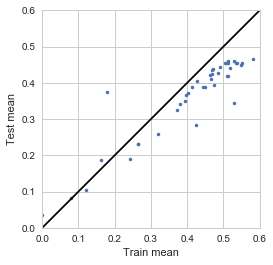

In [10]:
plt.subplot(1,1,1,aspect='equal')
plt.plot(spikefinder['train_mean'],spikefinder['test_mean'],'.')
plt.plot([0,1],[0,1],'k')
plt.xlabel('Train mean')
plt.ylabel('Test mean')
plt.xlim([0, .6])
plt.ylim([0, .6])


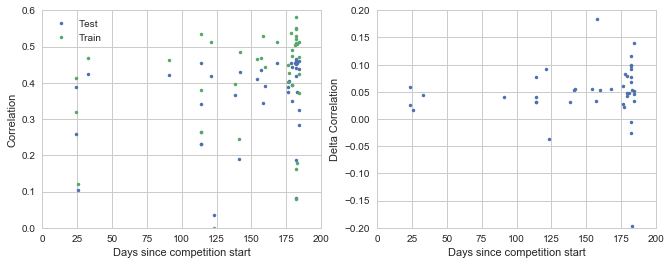

In [11]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
plt.plot(spikefinder['days'],spikefinder['test_mean'],'.')
plt.plot(spikefinder['days'],spikefinder['train_mean'],'.')
plt.xlim([0,200])
plt.ylim([0,.6])
plt.xlabel('Days since competition start')
plt.ylabel('Correlation')
plt.legend(['Test','Train'])

plt.subplot(1,2,2)
delta = spikefinder['train_mean'] - spikefinder['test_mean']
plt.plot(spikefinder['days'],delta,'.')
plt.xlim([0,200])
plt.ylim([-.2,.2])
plt.xlabel('Days since competition start')
plt.ylabel('Delta Correlation')

In [12]:
np.unique(data_test["algo_contact"])

array(['@freeman-lab', '@phreeza', 'arturspeiser@googlemail.com',
       'codekansas', 'dario@ucla.edu', 'haslacherdavid@gmail.com',
       'https://github.com/PTRRupprecht/SpikefinderCompetition2017',
       'j-friedrich', 'katsu1110', 'kazemipoura@janelia.hhmi.org',
       'kleskjr@gmail.com', 'marius10p', 'nikolay.chenkov@bccn-berlin.de',
       'nikolay@bccn-berlin.de', 'patrick.mineault@gmail.com',
       'patrickmineault', 'peter.rupprecht@fmi.ch',
       'philipp.berens@uni-tuebingen.de', 'phreeza',
       'thomas.deneux@unic.cnr-gif.fr', 'thomas.deneux@unic.cnrs-gif.fr',
       'thomas.mccolgan@gmail.com', 'tim.machado@gmail.com',
       'vcalderon@email.ifc.unam.mx'], dtype=object)

In [13]:
spikefinder


,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
0,stm,2016-11-25 02:33:35.196,24,test submission,0.387497,0.388992,0.413346,0.420325,0
1,oopsi,2016-11-25 02:36:37.119,24,test submission,0.258987,0.249635,0.318677,0.326346,-0.12851
2,derivative,2016-11-27 09:04:02.070,26,test submission,0.103576,0.115694,0.120749,0.123729,-0.283921
3,Suite2p,2016-12-04 19:15:26.173,33,marius10p,0.423142,0.428679,0.467852,0.471965,0.035645
4,Vanilla_0.0a,2017-01-31 04:10:09.410,91,Dario Ringach,0.422702,0.428309,0.462818,0.45457,0.0352045
5,LN base,2017-02-23 08:13:57.073,114,Patrick Mineault,0.231342,0.23637,0.263221,0.262621,-0.156156
7,LN base,2017-02-23 08:24:54.813,114,Patrick Mineault,0.231342,0.23637,0.263221,0.262621,-0.156156
8,MLspike,2017-02-23 15:18:17.677,114,Thomas Deneux,0.455631,0.459057,0.533527,0.526033,0.0681337
10,Adaptive Derivative,2017-02-23 19:29:44.375,114,Peter Rupprecht,0.340396,0.347359,0.380097,0.384646,-0.0471016
12,1D ConvNet with a bunch of features,2017-03-02 04:18:15.017,121,Ben Bolte and Chi Le,0.419496,0.416914,0.512118,0.506926,0.0319989


In [14]:
spikefinder_unique

,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
0,Purgatorio,2017-05-02 02:33:43.187,182,Patrick Mineault,0.464457,0.461653,0.58074,0.570199,0.0769593
1,convi6,2017-05-04 12:59:26.058,184,Nikolay,0.461296,0.461945,0.51327,0.504478,0.0737989
2,Embedding of CNNs via Ca recording stats,2017-05-02 07:56:05.626,182,"Peter Rupprecht, Stephan Gerhard",0.460598,0.461709,0.528088,0.51411,0.0731003
3,SpikeNet-3,2017-04-18 08:49:32.462,168,Thomas McColgan,0.455694,0.455387,0.511553,0.501417,0.0681964
4,MLspike,2017-02-23 15:18:17.677,114,Thomas Deneux,0.455631,0.459057,0.533527,0.526033,0.0681337
6,DeepSpike (Fully Supervised),2017-05-01 22:58:32.331,181,Artur Speiser,0.454813,0.460792,0.503557,0.495718,0.0673159
11,linear gaussian,2017-05-02 00:51:29.385,182,johannes,0.441689,0.437386,0.519541,0.513403,0.0541916
14,Vanilla_0.1a,2017-03-23 18:30:50.419,142,Dario Ringach,0.428483,0.425476,0.48377,0.474737,0.0409861
15,Suite2p,2016-12-04 19:15:26.173,33,marius10p,0.423142,0.428679,0.467852,0.471965,0.035645
17,1D ConvNet with a bunch of features,2017-03-02 04:18:15.017,121,Ben Bolte and Chi Le,0.419496,0.416914,0.512118,0.506926,0.0319989


In [15]:
spikefinder_unique

,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
0,Purgatorio,2017-05-02 02:33:43.187,182,Patrick Mineault,0.464457,0.461653,0.58074,0.570199,0.0769593
1,convi6,2017-05-04 12:59:26.058,184,Nikolay,0.461296,0.461945,0.51327,0.504478,0.0737989
2,Embedding of CNNs via Ca recording stats,2017-05-02 07:56:05.626,182,"Peter Rupprecht, Stephan Gerhard",0.460598,0.461709,0.528088,0.51411,0.0731003
3,SpikeNet-3,2017-04-18 08:49:32.462,168,Thomas McColgan,0.455694,0.455387,0.511553,0.501417,0.0681964
4,MLspike,2017-02-23 15:18:17.677,114,Thomas Deneux,0.455631,0.459057,0.533527,0.526033,0.0681337
6,DeepSpike (Fully Supervised),2017-05-01 22:58:32.331,181,Artur Speiser,0.454813,0.460792,0.503557,0.495718,0.0673159
11,linear gaussian,2017-05-02 00:51:29.385,182,johannes,0.441689,0.437386,0.519541,0.513403,0.0541916
14,Vanilla_0.1a,2017-03-23 18:30:50.419,142,Dario Ringach,0.428483,0.425476,0.48377,0.474737,0.0409861
15,Suite2p,2016-12-04 19:15:26.173,33,marius10p,0.423142,0.428679,0.467852,0.471965,0.035645
17,1D ConvNet with a bunch of features,2017-03-02 04:18:15.017,121,Ben Bolte and Chi Le,0.419496,0.416914,0.512118,0.506926,0.0319989


In [16]:
spikefinder_unique.to_csv('spikefinder_unique.csv')